## 准备数据

我们采用“感知机”一文中相同的数据，即著名的鸢尾花数据集“iris”：


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


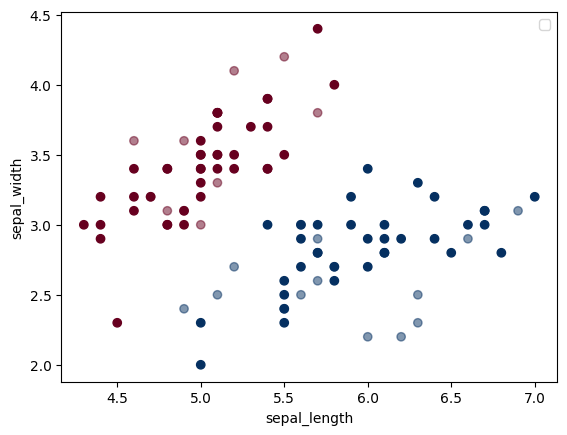

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split

# load data
iris = sns.load_dataset("iris")

# 取出'sepal_length'，'sepal_width'和'species'，前100个数据，前50个'species'是'setosa'，后50个'species'是'versicolor'
data = np.array(iris.iloc[:100, [0, 1, -1]])
# 第一维度全部取出(100行)，第二维度取出第一个列，到倒数第二个列
X = data[:,:-1]
# 二分类'species'标签，'setosa'值为-1，'versicolor'值为1
y = np.array([1 if s == 'versicolor' else -1 for s in data[:,-1]])

# 选取25%的数据用于测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdBu')
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.3, cmap='RdBu')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.legend()

## 训练模型

下面我们来看看使用这个数据训练支持向量机模型的实际结果。我们会在这些数据上使用`sklearn`支持向量机分类器`SVC`来训练一个SVM模型。

`SVC`有一个参数`C`，称为惩罚参数，其值一般由应用问题决定。当C值大时对误分类的惩罚增大，当C值小时对误分类的惩罚减小。如果数据线性可分，我们可以增大`C`，以增加准确度。如果数据线性不可分，则应该减小`C`，以容许一定量的误分类存在。

In [6]:
from sklearn.svm import SVC # 支持向量分类器


# C值大，减少误分类，针对线性可分数据，硬间隔最大化
model_hard = SVC(kernel='linear', C=1E10)
model_hard.fit(X_train, y_train)
# C值小，容许误分类，针对线性不可分数据，软间隔最大化
model_soft = SVC(kernel='linear', C=1)
model_soft.fit(X_train, y_train)

SVC(C=1, kernel='linear')

要更好的可视化展示发生的事情，我们创建一个快速的工具函数来绘制SVM的边界：

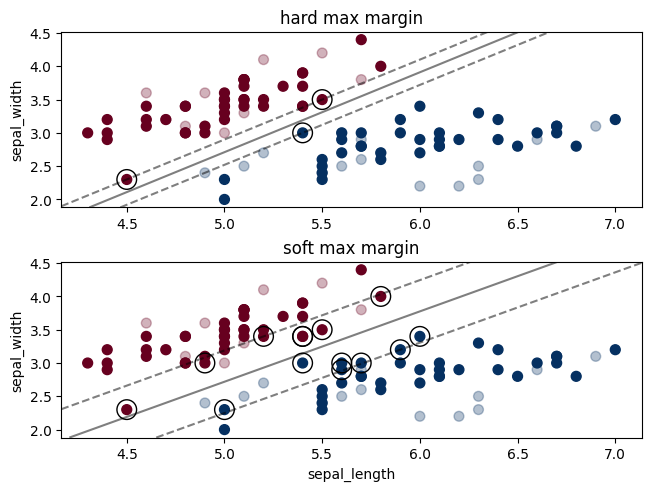

In [7]:
def plot_svc_decision_function(model, ax):
    """绘制2D SVC图像函数"""
    assert ax is not None
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建网格来展示数据
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # 超平面S在坐标(x,y)下对应的值
    P = model.decision_function(xy).reshape(X.shape)

    # 绘制边界和间距，即超平面S的等高线：f(x,y)=0, f(x,y)=1, f(x,y)=-1
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # 绘制支持向量
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=200, edgecolors='k', facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig, ax = plt.subplots(2, 1, constrained_layout=True)

ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='RdBu')
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, alpha=0.3, cmap='RdBu')
ax[0].set_ylabel('sepal_width')
ax[0].set_title("hard max margin")
plot_svc_decision_function(model_hard, ax[0])

ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='RdBu')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, alpha=0.3, cmap='RdBu')
ax[1].set_xlabel('sepal_length')
ax[1].set_ylabel('sepal_width')
ax[1].set_title("soft max margin")
plot_svc_decision_function(model_soft, ax[1])


上图中被圈出的点，是这个模型训练的关键元素，被称为**支持向量**，也是这个算法名称的由来。由于采用间隔最大化(对最难分的实例点也有足够大的确信度将它们分开)，因此不同于感知机，支持向量机的分离超平面是唯一确定的。

在线性可分的情况下，间隔最大化称为**硬间隔**最大化，训练数据集的样本点中与分离超平面距离最近的样本点的实例称为支持向量(support vector)。在决定分离超平面时只有支持向量起作用，而其他实例点并不起作用。支持向量的个数一般很少，所以支持向量机由很少的“重要的”训练样本确定。


在线性不可分的情况下，间隔最大化称为**软间隔**最大化。软间隔的支持向量$x_{i}$或者在间隔边界上，或者在间隔边界与超平面之间，或者在分离超平面误分一侧。具体数学关系，请参考“线性支持向量机”理论部分。

## 测试模型


In [8]:
from sklearn.metrics import accuracy_score

predictions_hard = model_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, predictions_hard)
print("SVM hard linear kernel accuracy: " + str(accuracy_hard))

predictions_soft = model_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, predictions_hard)
print("SVM soft linear kernel accuracy: " + str(accuracy_soft))

SVM hard linear kernel accuracy: 1.0
SVM soft linear kernel accuracy: 1.0
